In [7]:
!pip install wordcloud
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 3.4 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.7 MB/s eta 0:00:00


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import warnings

# Load your cuneiform dataset
# df = pd.read_csv('cuneiform_dataset.csv')
# Assuming columns: 'transcription', 'transliteration', 'english_translation'

print("Suggested data analysis for cuneiform datasets:")
print("2. Character frequency analysis in transcriptions")
print("3. Word frequency analysis in translations")
print("4. Language complexity comparison")
print("5. Topic modeling and clustering")
print("6. Temporal/historical analysis")
print("7. Linguistic pattern recognition")
print("8. Translation quality assessment")
print("9. Vocabulary richness analysis")
print("10. Cross-linguistic correlations")

Suggested data analysis for cuneiform datasets:
2. Character frequency analysis in transcriptions
3. Word frequency analysis in translations
4. Language complexity comparison
5. Topic modeling and clustering
6. Temporal/historical analysis
7. Linguistic pattern recognition
8. Translation quality assessment
9. Vocabulary richness analysis
10. Cross-linguistic correlations


## Merge Datasets

In [22]:
translation_train = pd.read_csv('../datasets/SumTablets_English_test.csv')
translation_val = pd.read_csv('../datasets/SumTablets_English_validation.csv')
translation_test = pd.read_csv('../datasets/SumTablets_English_test.csv')

sumTablets_train = pd.read_csv('../datasets/SumTablets_train.csv')
sumTablets_val = pd.read_csv('../datasets/SumTablets_validation.csv')
sumTablets_test = pd.read_csv('../datasets/SumTablets_test.csv')

In [24]:
display(translation_train.head())
display(sumTablets_train)

,id,period,genre,transliteration,translation
0,P459086,Ur III,Administrative,\n...guruš engar dumu-ni\n...ur-mes\n1(u) 1(di...,"n male laborers, plowman and his sons,\nforema..."
1,P465343,Ur III,Royal Inscription,\n1(diš) udu gir-ru-um niga\n2(diš) udu eme-gi...,"1 kirrum sheep, grain-fed,\n2 emegi rams,\nfor..."
2,P480378,Ur III,Administrative,\n2(diš) udu-nita₂ kur-ra bar-gal₂\n1(diš) sil...,"2 male sheep of the mountain, with fleece,\n1 ..."
3,P346107,Old Babylonian,Literary,\n...nin₉ ki aŋ₂ {d}dumu-zid-de₃\n...gur₃-ru k...,... beloved sister of Dumuzi\nExuding/bearing ...
4,P454330,Ur III,Administrative,\n<unk> nin\ndub-sar\ndumu šeš-kal-la,"Šu-Suen,\nstrong king,\nking of Ur:\nAḫuni,\nc..."


,id,period,genre,transliteration,glyph_names,glyphs
0,P119622,Ur III,Administrative,<SURFACE>\n2(u) udu\nki nin-še₃\nki uš-mu-ta\n...,<SURFACE> \n |U.U| LU \n KI |SAL.TUG₂| EŠ₂ \n ...,<SURFACE>\n𒎙𒇻\n𒆠𒎏𒂠\n𒆠𒍑𒈬𒋫\n𒁾𒉺𒋼𒋛𒅗\n<SURFACE>\n𒊮𒋀...
1,P107676,Ur III,Administrative,<SURFACE>\n1(diš) sila₄ {d}utu\nmu-kuₓ(DU) ur-...,<SURFACE> \n DIŠ |GA₂×PA| AN UD \n MU DU UR LU...,<SURFACE>\n𒁹𒃢𒀭𒌓\n𒈬𒁺𒌨𒈛𒋡𒋗𒃮\n𒁹𒃢𒀭𒂗𒆤\n𒈬𒁺𒈗𒉺𒌓𒁺𒌉𒈗\n𒁹𒃢𒀭...
2,P130129,Ur III,Administrative,<SURFACE>\n4(geš₂) 3(u) 8(aš) 3(barig) 2(ban₂)...,<SURFACE> \n 4(GEŠ₂) |U.U.U| 8(AŠ) NIGIDAEŠ 2(...,<SURFACE>\n𒐘𒌍𒐆𒑗𒑐𒐉𒋡𒌋𒂆𒊺𒄥\n𒀉𒈣𒂠𒂷\n𒆠𒅗𒄦\n𒁾𒈗𒂊𒁀𒀭𒊷\n<SU...
3,P107643,Ur III,Administrative,<SURFACE>\n...udu niga\n{d}en-lil₂\n2(diš) udu...,<SURFACE> \n...LU ŠE \n AN EN KID \n MIN LU ŠE...,<SURFACE>\n...𒇻𒊺\n𒀭𒂗𒆤\n𒈫𒇻𒊺𒀭𒎏𒆤\n𒀭𒀏<unk>𒃲𒉺𒁽\n𒌗𒌓𒌋...
4,P209474,Ur III,Administrative,<SURFACE>\n1(aš) 2(barig) še sig₁₅ ba-ba gur\n...,<SURFACE> \n AŠ NIGIDAMIN ŠE KAL BA BA GUR \n ...,<SURFACE>\n𒀸𒑖𒊺𒆗𒁀𒁀𒄥\n𒀀𒁺𒁺𒅎\n𒐃𒑖𒑑𒌨𒀭𒉣𒃲𒂷𒊏\n<SURFACE>...
...,...,...,...,...,...,...
82447,P212052,Ur III,Administrative,<SURFACE>\n1(diš) udu niga\neš₃-še₃\n1(diš) ud...,<SURFACE> \n DIŠ LU ŠE \n AB EŠ₂ \n DIŠ LU ŠE ...,<SURFACE>\n𒁹𒇻𒊺\n𒀊𒂠\n𒁹𒇻𒊺\n𒅗𒈪𒆦𒊏\n𒁹𒇻𒄞𒂊𒍑𒊓\n𒀭𒈾𒈾𒀀\n<...
82448,P109327,Ur III,Royal Inscription,<SURFACE>\nur-nigar-mu\nu₃ ur-sukkal\nu₃-na-a-...,<SURFACE> \n UR |U.UD.KID| MU \n |IGI.DIB| UR ...,<SURFACE>\n𒌨𒌋𒌓𒆤𒈬\n𒅇𒌨𒈛\n𒅇𒈾𒀀𒅗\n𒄞𒀉𒆷𒆷\n𒋗𒃶𒁇𒊑\n<SURF...
82449,P124897,Ur III,Administrative,<SURFACE>\n1(diš) sila₄ {d}nin-hur-sag\n1(diš)...,<SURFACE> \n DIŠ |GA₂×PA| AN |SAL.TUG₂| |HI×AŠ...,<SURFACE>\n𒁹𒃢𒀭𒎏𒄯𒊕\n𒁹𒃢𒀭𒂄𒉺𒌓𒁺\n𒈬𒁺𒌓𒅗𒁇𒆪\n𒀭𒀏<unk>𒃲𒉺𒁽...
82450,P126510,Ur III,Administrative,<SURFACE>\n1(diš) sila₄ niga\nka-izi-še₃\n6(di...,<SURFACE> \n DIŠ |GA₂×PA| ŠE \n KA NE EŠ₂ \n 6...,<SURFACE>\n𒁹𒃢𒊺\n𒅗𒉈𒂠\n𒐋𒃢𒂵\n𒀀𒁵𒂠\n𒌨𒋗𒉌𒆪\n𒁲𒅗𒈗\n<SUR...


### Text length analysis across languages

In [43]:
# create a cleaed dataset with just transliteration and translation but stripping
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.strip().lower()

translation_train['transliteration'] = translation_train['transliteration'].apply(clean_text)
translation_train['translation'] = translation_train['translation'].apply(clean_text)
translation_train

,id,period,genre,transliteration,translation,text_length
0,P459086,Ur III,Administrative,guruš engar dumuni urmes 1u 1diš guruš ugula u...,n male laborers plowman and his sons foreman u...,86
1,P465343,Ur III,Royal Inscription,1diš udu girruum niga 2diš udu emegira nita₂ m...,1 kirrum sheep grainfed 2 emegi rams for heave...,49
2,P480378,Ur III,Administrative,2diš udunita₂ kurra bargal₂ 1diš sila₄ nita₂ k...,2 male sheep of the mountain with fleece 1 mal...,38
3,P346107,Old Babylonian,Literary,nin₉ ki aŋ₂ ddumuzidde₃ gur₃ru ki aŋ₂ ddur₇dur...,beloved sister of dumuzi exudingbearing belove...,375
4,P454330,Ur III,Administrative,unk nin dubsar dumu šeškalla,šusuen strong king king of ur aḫuni cupbearer ...,11
...,...,...,...,...,...,...
108,P273525,Ur III,Administrative,1diš udu bargal₂ bauš₂ ki ku₃ganita kišib₃ lu₂...,1 sheep with fleece slaughtered from kugani un...,28
109,P131769,Ur III,Administrative,3diš gal sagkul zabar kila₂bi 2diš 13diš mana ...,3 large bowls bronze their weight 2 13 mana 4 ...,300
110,P136312,Ur III,Administrative,pisan dubba ziga u₃ kurušdae ib₂dab₅ ša₃ kušdu...,basketoftablets xxx xxx xxx xxx xxx xxx,7
111,P139619,Ur III,Administrative,pisan dubba ab₂ e₂tur₃ra gu₄gešapin udu namenn...,basketoftablets xxx xxx xxx xxx xxx xxx xxx,8


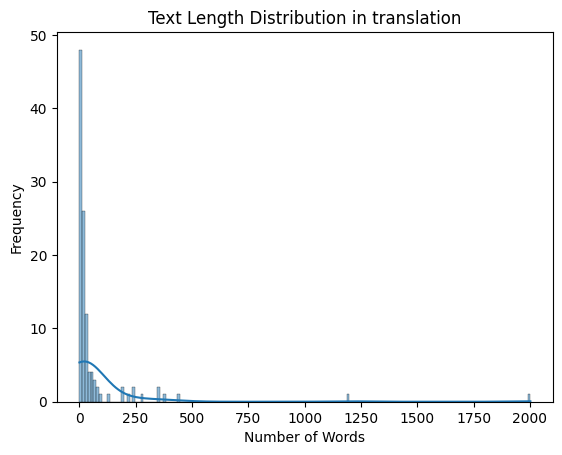

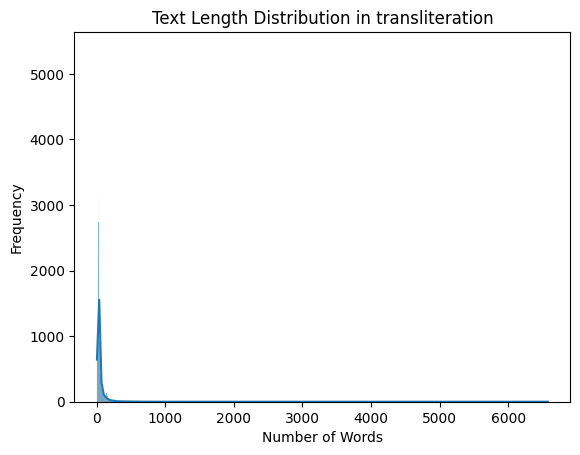

In [ ]:
def text_length_analysis(df, column):
    df['text_length'] = df[column].apply(lambda x: len(x.split()))
    sns.histplot(df['text_length'], kde=True)
    plt.title(f'Text Length Distribution in {column}')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()

text_length_analysis(translation_train, 'translation')
text_length_analysis(sumTablets_train, 'transliteration')

### Character frequency analysis in transcriptions

In [54]:
# clean sumTablets_train glyphs
def clean_glyphs(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'[a-zA-Z]', '', text)  # Remove Latin characters
    return text.strip().lower()
sumTablets_train['glyphs'] = sumTablets_train['glyphs'].apply(clean_glyphs)
sumTablets_train

,id,period,genre,transliteration,glyph_names,glyphs,text_length
0,P119622,Ur III,Administrative,<SURFACE>\n2(u) udu\nki nin-še₃\nki uš-mu-ta\n...,<SURFACE> \n |U.U| LU \n KI |SAL.TUG₂| EŠ₂ \n ...,𒎙𒇻 𒆠𒎏𒂠 𒆠𒍑𒈬𒋫 𒁾𒉺𒋼𒋛𒅗 𒊮𒋀𒀊𒆠𒈠 𒌗𒂡𒈤 𒈬𒂗𒉣𒆠𒁀𒂠 𒀭𒀫𒀭𒂗𒍪 𒈗𒆗𒂵 𒈗...,35
1,P107676,Ur III,Administrative,<SURFACE>\n1(diš) sila₄ {d}utu\nmu-kuₓ(DU) ur-...,<SURFACE> \n DIŠ |GA₂×PA| AN UD \n MU DU UR LU...,𒁹𒃢𒀭𒌓 𒈬𒁺𒌨𒈛𒋡𒋗𒃮 𒁹𒃢𒀭𒂗𒆤 𒈬𒁺𒈗𒉺𒌓𒁺𒌉𒈗 𒁹𒃢𒀭𒈹 𒁹𒃢𒀭𒎏𒄢 𒈬𒁺𒋻𒁕𒈬𒉺𒀠...,78
2,P130129,Ur III,Administrative,<SURFACE>\n4(geš₂) 3(u) 8(aš) 3(barig) 2(ban₂)...,<SURFACE> \n 4(GEŠ₂) |U.U.U| 8(AŠ) NIGIDAEŠ 2(...,𒐘𒌍𒐆𒑗𒑐𒐉𒋡𒌋𒂆𒊺𒄥 𒀉𒈣𒂠𒂷 𒆠𒅗𒄦 𒁾𒈗𒂊𒁀𒀭𒊷 𒈬𒀀𒁺𒈫𒄰𒊭𒀸𒊒𒌝𒆠𒁀𒅆𒌨 𒈗𒂊𒁀𒀭...,30
3,P107643,Ur III,Administrative,<SURFACE>\n...udu niga\n{d}en-lil₂\n2(diš) udu...,<SURFACE> \n...LU ŠE \n AN EN KID \n MIN LU ŠE...,𒇻𒊺 𒀭𒂗𒆤 𒈫𒇻𒊺𒀭𒎏𒆤 𒀭𒀏𒃲𒉺𒁽 𒌗𒌓𒌋𒁹𒁀𒉌 𒍣𒂵 𒆠𒈾𒈜 𒌗𒋗𒌍𒊭 𒈬𒆠𒈦𒆠𒅇𒄷𒄯...,28
4,P209474,Ur III,Administrative,<SURFACE>\n1(aš) 2(barig) še sig₁₅ ba-ba gur\n...,<SURFACE> \n AŠ NIGIDAMIN ŠE KAL BA BA GUR \n ...,𒀸𒑖𒊺𒆗𒁀𒁀𒄥 𒀀𒁺𒁺𒅎 𒐃𒑖𒑑𒌨𒀭𒉣𒃲𒂷𒊏 𒊺𒀳𒇲𒁺𒁀 𒆠𒇭𒌨𒄖 𒌗𒊺𒋼𒀀𒊏𒅅𒆷 𒈬𒈠𒁕𒍝...,27
...,...,...,...,...,...,...,...
82447,P212052,Ur III,Administrative,<SURFACE>\n1(diš) udu niga\neš₃-še₃\n1(diš) ud...,<SURFACE> \n DIŠ LU ŠE \n AB EŠ₂ \n DIŠ LU ŠE ...,𒁹𒇻𒊺 𒀊𒂠 𒁹𒇻𒊺 𒅗𒈪𒆦𒊏 𒁹𒇻𒄞𒂊𒍑𒊓 𒀭𒈾𒈾𒀀 𒀊𒀊𒂍𒌓𒌋𒐊 𒍣𒂵𒊮𒀕𒆠𒂵 𒆠𒌧𒃶𒈾...,35
82448,P109327,Ur III,Royal Inscription,<SURFACE>\nur-nigar-mu\nu₃ ur-sukkal\nu₃-na-a-...,<SURFACE> \n UR |U.UD.KID| MU \n |IGI.DIB| UR ...,𒌨𒌋𒌓𒆤𒈬 𒅇𒌨𒈛 𒅇𒈾𒀀𒅗 𒄞𒀉𒆷𒆷 𒋗𒃶𒁇𒊑 𒋗𒀭𒂗𒍪 𒆠𒉘𒀭𒂗𒆤𒇲 𒈗𒆗𒂵 𒈗𒀭𒌒𒁕𒇹...,29
82449,P124897,Ur III,Administrative,<SURFACE>\n1(diš) sila₄ {d}nin-hur-sag\n1(diš)...,<SURFACE> \n DIŠ |GA₂×PA| AN |SAL.TUG₂| |HI×AŠ...,𒁹𒃢𒀭𒎏𒄯𒊕 𒁹𒃢𒀭𒂄𒉺𒌓𒁺 𒈬𒁺𒌓𒅗𒁇𒆪 𒀭𒀏𒃲𒉺𒁽 𒁹𒇻𒁹𒈧 𒄑𒄖𒍝𒀭𒂄𒄀𒊏 𒊮𒈬𒁺𒂟𒈦...,57
82450,P126510,Ur III,Administrative,<SURFACE>\n1(diš) sila₄ niga\nka-izi-še₃\n6(di...,<SURFACE> \n DIŠ |GA₂×PA| ŠE \n KA NE EŠ₂ \n 6...,𒁹𒃢𒊺 𒅗𒉈𒂠 𒐋𒃢𒂵 𒀀𒁵𒂠 𒌨𒋗𒉌𒆪 𒁲𒅗𒈗 𒆠𒉡𒌫𒀭𒅎𒋫 𒁀𒍣 𒌗𒂡𒀭𒂄𒄀 𒈬𒀭𒋗𒀭𒂗...,31


C:\Users\stras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Cuneiform.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\stras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Cuneiform.
  fig.canvas.print_figure(bytes_io, **kw)


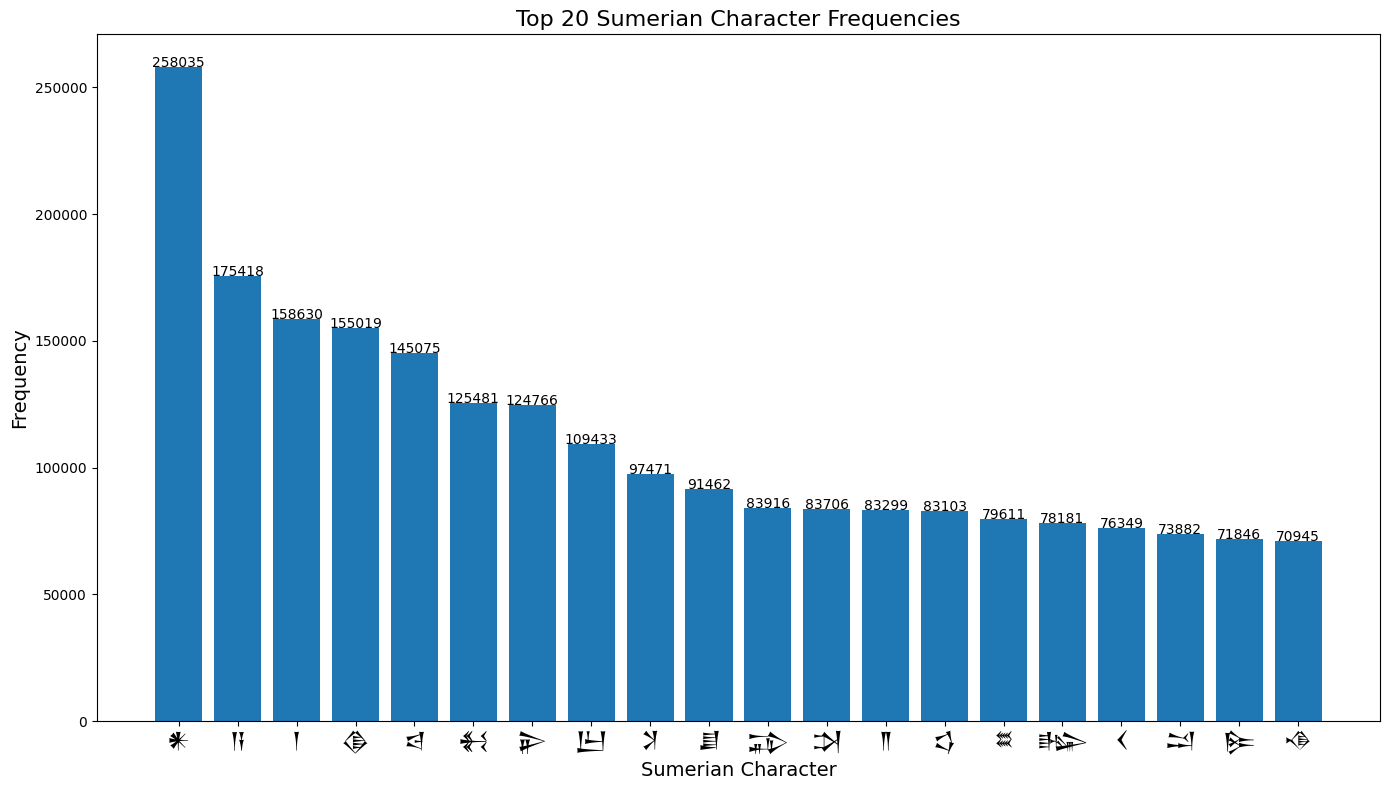

Top 20 Sumerian characters by frequency:


,Character,Frequency
23,𒀭,258035
32,𒀀,175418
36,𒁹,158630
2,𒆠,155019
22,𒁀,145075
...,...,...
507,𒂤,1
613,𒃺,1
612,𒅺,1
615,𒇚,1


In [61]:
def character_frequency_analysis(df, column, font_path='../fonts/SumerianFont.ttf'):
    import matplotlib.font_manager as fm
    import matplotlib as mpl
    
    # Register the custom font
    custom_font = fm.FontProperties(fname=font_path)
    
    # Save original font settings
    original_font_family = mpl.rcParams['font.family']
    
    # Get character frequencies
    all_text = ''.join(df[column].astype(str).tolist())
    char_counts = Counter([char for char in all_text if char != ' ' and char != ''])
    char_df = pd.DataFrame(char_counts.items(), columns=['Character', 'Frequency'])
    char_df = char_df.sort_values(by='Frequency', ascending=False)
    
    # Create the plot
    plt.figure(figsize=(14, 8))
    bars = plt.bar(char_df['Character'].head(20), char_df['Frequency'].head(20))
    
    # Configure the plot with default font for titles and labels (not Cuneiform)
    plt.title('Top 20 Sumerian Character Frequencies', fontsize=16)
    plt.xlabel('Sumerian Character', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Only use Cuneiform font for the x-tick labels (the actual Sumerian characters)
    plt.xticks(fontproperties=custom_font, fontsize=16, rotation=0)
    
    # Add frequency values above bars with default font
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{int(height)}', ha='center', fontsize=10)
    
    # Apply tight layout with warning suppression
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plt.tight_layout()
    
    plt.show()
    
    # Restore original font settings
    mpl.rcParams['font.family'] = original_font_family
    
    return char_df

sumerian_font_path = '../fonts/NotoSansCuneiform-Regular.ttf'
char_df = character_frequency_analysis(sumTablets_train, 'glyphs', sumerian_font_path)

print("Top 20 Sumerian characters by frequency:")
display(char_df)